In [14]:
#es 1
import pandas as pd

# Carica il dataset
df = pd.read_csv("owid-covid-data.csv")

# Mostra dimensioni del dataset
print("Dimensioni del dataset:", df.shape)

# Mostra i nomi delle colonne e i tipi di dati
print("\nInformazioni sulle colonne:")
print(df.dtypes)


Dimensioni del dataset: (429435, 67)

Informazioni sulle colonne:
iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object


In [16]:
#es 2

# Filtra i dati solo per i continenti (non per i singoli paesi)
continents_df = df[df['continent'].notna()]

# Trova la data minima per ogni continente
total_cases_by_continent = continents_df.groupby("continent").agg({
    "total_cases": "max"
}).reset_index()

# Totale mondiale
total_global_cases = total_cases_by_continent["total_cases"].sum()

# Aggiunge la percentuale rispetto al totale mondiale
total_cases_by_continent["percentuale_mondiale"] = (
    total_cases_by_continent["total_cases"] / total_global_cases * 100
)

print(total_cases_by_continent)


       continent  total_cases  percentuale_mondiale
0         Africa    4072765.0              1.379413
1           Asia   99373219.0             33.656928
2         Europe   38997490.0             13.208143
3  North America  103436829.0             35.033241
4        Oceania   11861161.0              4.017282
5  South America   37511921.0             12.704993


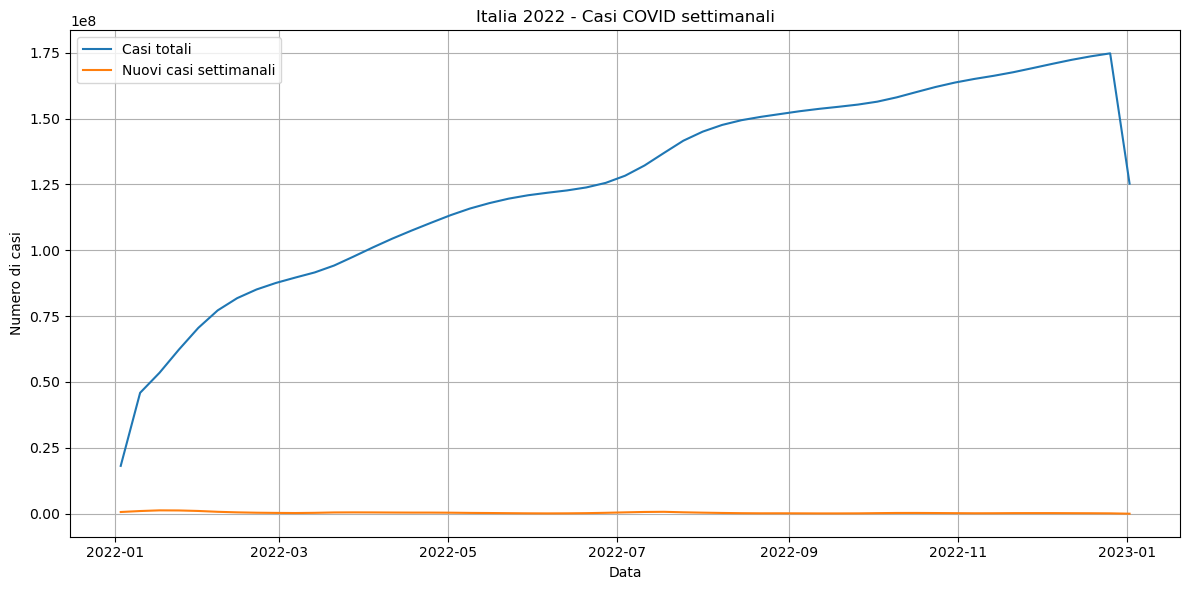

In [20]:
#es 3

# Converti la colonna "date" in formato datetime
df["date"] = pd.to_datetime(df["date"])

# Filtra per l'Italia e per l'anno 2022
italy_2022 = df[(df["location"] == "Italy") & (df["date"].dt.year == 2022)]

# Rimuove i giorni con nuovi casi nulli
italy_2022 = italy_2022[italy_2022["new_cases"].notna()]

# Raggruppa per settimana
italy_weekly = italy_2022.resample('W-Mon', on='date').sum()

import matplotlib.pyplot as plt

# Grafico: evoluzione dei casi totali e nuovi casi
plt.figure(figsize=(12,6))
plt.plot(italy_weekly.index, italy_weekly["total_cases"], label="Casi totali")
plt.plot(italy_weekly.index, italy_weekly["new_cases"], label="Nuovi casi settimanali")
plt.title("Italia 2022 - Casi COVID settimanali")
plt.xlabel("Data")
plt.ylabel("Numero di casi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


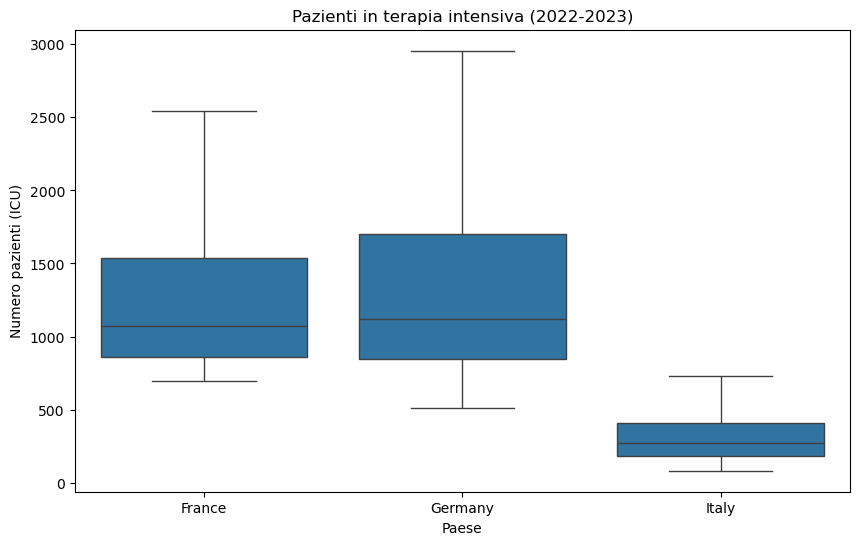

In [30]:
#es 4

import seaborn as sns
import matplotlib.pyplot as plt

# Filtra i dati
icu_df = df[
    (df["location"].isin(["Italy", "France", "Germany"])) &
    (df["date"] >= "2022-01-01") & (df["date"] <= "2023-04-30")
]

# Rimuovi righe con valori nulli in icu_patients
icu_df = icu_df[icu_df["icu_patients"].notna()]

# Grafico boxplot senza outliers (pallini)
plt.figure(figsize=(10,6))
sns.boxplot(data=icu_df, x="location", y="icu_patients", showfliers=False)
plt.title("Pazienti in terapia intensiva (2022-2023)")
plt.ylabel("Numero pazienti (ICU)")
plt.xlabel("Paese")
plt.show()


In [32]:
# Esercizio 5

covid_data = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

paesi = ['Italy', 'Germany', 'France', 'Spain']
mask_anno  = covid_data.date.dt.year == 2021
mask_paesi = covid_data.location.isin(paesi)
dati_2021  = covid_data[mask_anno & mask_paesi]

# Somma dei pazienti ospedalizzati per nazione, mantenendo NaN se tutti i valori sono mancanti
somme_ospedalizzati = (
    dati_2021
    .groupby('location')['hosp_patients']
    .sum(min_count=1)
)

# a) Output numerico
print("Somma Pazienti Ospedalizzati 2021:")
print(somme_ospedalizzati.to_string())
print()

# a) Output grafico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=somme_ospedalizzati.index, y=somme_ospedalizzati.values)
plt.title('Somma Pazienti Ospedalizzati 2021')
plt.xlabel('Nazione')
plt.ylabel('Totale Pazienti Ospedalizzati')
plt.show()

# b) Commento sui dati nulli
print("Paesi con pochi NaN si possono stimare per approssimazione, ma se tutti i valori sono NaN (es. Germany) \nnon ha senso sostituirli.")

Media pazienti ospedalizzati nel 2021:
  location  hosp_patients
0   France   16462.238356
1    Italy   12109.452055
2    Spain    6607.413699
